# Logistic Regression Homework

This is the 2nd assignment for CAP 4630 and we will implement logistic regression and apply it to two
different datasets. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)** \
You are **not** allowed to use Machine Learning libaries such as Scikit-learn and Keras.

**Task Overview:**
- Logistic Regression 
- Regularized logistic regression

## 1 - Logistic Regression ##
### 1.1 Packages

Import useful packages for scientific computing and data processing. 

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.

In [26]:
# Import and rename libraries here
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

### 1.2 - Data Preparation ##

Prepare the data for regression task. **(5 Points)**

**Tasks:**
1. Load data for logistic regression.
2. Generate the scatter plot of the data.

**Hints:**
1. The data file is "data_logistic.csv", which are exam scores for students.
2. The data is organized by column: x1 (exam 1 score), x2 (exam 2 score), and label y (pass 1 or fail 0).
3. Please use different colors for postive(label=1) and negative(label=0) data.
4. An example of scatter plots is shown below.
![mxplusc](data_plots.png)

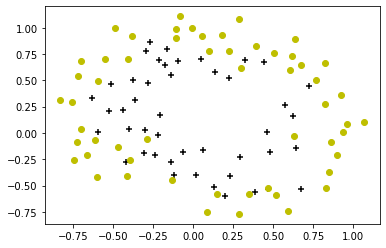

In [27]:
# Preprocess input data and generate plots
data = pd.read_csv('data_reg_logistic.csv')
x = data.iloc[:, 0]
y = data.iloc[:, 1]
label = data.iloc[:, 2]
for i in range(len(label)):
    t = label[i]
    if t == 1:
        plt.scatter(x[i], y[i], color = 'black', marker = '+')
    else:
        plt.scatter(x[i], y[i], color = 'y')

plt.show()

### 1.3 - Sigmoid function ##


Implement sigmoid function so it can be called by the rest of your program. **(10 Points)**

**Tasks:**
1. Implement the sigmoid function (**def sigmoid(z):**). 
2. Test the sigmoid function by function plotting with test data (X, Y) where Y = sigmoid(X). 

**Hints:**  
1. Given the class material, sigmoid function is defined as:
$g(z) = \frac{1}{1+e^{-z}}$.
2. You may consider X = np.linspace(-5, 5, 1000) to plot the curve.
3. Plot Y against X.
4. An example of plot for validation is shown below:
![mxplusc](sigmoid_illustration.jpg)

In [37]:
# Implement sigmoid fuction here
def sigmoid(z: float) -> float:
    return 1 / (1 + math.exp(-z))


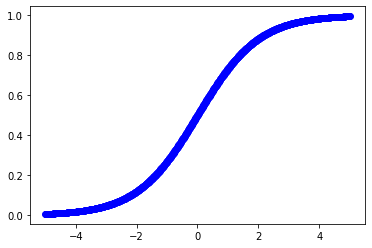

done!


In [46]:
# Plot data here
x = np.linspace(-5, 5, 1000)
for i in x:
    plt.scatter(i, sigmoid(i), color = 'b')
    
plt.show()
print('done!')

### 1.4 - Cost function and gradient ##

Implement the cross entropy cost function and its gradient for logistic regression. **(20 Points)**

**Tasks:**
1. Implement the "cal_cost" to compute the cost.
2. Implement the "cal_grad" to compute the gradients.
3. Test "cal_cost" and "cal_grad" with initial values and print out the results.

**Hint:**
1. The cross entropy cost function (J(θ)) in logistic regression is shown below. It involves two terms, including ylog(h) and (1-y)log(1-h) where h is the function of x.
![mxplusc](equation_J.jpg)
2. The gradient of the cost J(θ) is a vector of the same length as θ where the $j$th element (for $j = 0, 1, . . . , n)$ is defined below. You may do a hand calculation to justify the first order derivative with the term above.
![mxplusc](equation_theta.jpg)
3. When you implement J(θ), please use eps = 1e-15 to prevent possible "divide by 0 exception" in second term. You may think about the reason.
4. You may consider the below templates for two functions:

    def cal_cost(theta, X, y):
 
        htheta = ...
        term1 = ...  /* matrix_multiplication(log(htheta), y)
        term2 = ...  /* matrix_multiplication(log(1-htheta+eps), (1-y))
        J = - 1 / m * (term1 + term2) 
        
        return cost
        
    
    def cal_grad(theta, X, y):
        
        htheta = ...
        term1 = ... /* matrix_multiplication(transpose(X), (htheta - y))  //you may think about why transpose(x)
        grad = 1 / m * term1 
    
        return grad
5. It involves matrix multiplication and you may consider the function of np.matmul or np.dot.   
        
6. Initialize the intercept term with **ones** and the theta with **zeros**. Test the functions with these initial values. \
    **Expected outputs:**\
    Cost at initial theta : 0.6931471805599445\
    Gradient at inital theta : [-0.1        -10.91242026 -11.73652937]


In [ ]:
# Implement the cost function here

#def cal_cost(theta, X, y):
    
#    return J

############################################
#def cal_grad(theta, X, y):
    
#    return grad
    
    
#print ('Cost at initial theta: {0}'.format(J))
#print ('Gradient at inital theta:\n {0}'.format(grad))


## 1.5 Train parameters with Gradient Descent ##


Train parameters using Gradient Descent. **(10 Points)**

**Tasks:**
1. Calculate best fit theta by Gradient Descent with learning rate of **0.001** and epoch of **800K**. The initial theta from above blocks is used as initial values.
2. Print out the best theta (the last one is considered as the best here) and its corresponding cost.
3. Plot the decision boundary.

**Hints:**
1. You may take gradient descent in homework 1 as an template.
2. The validation of first 5 epochs (updated theta and cost): \
------Epoch 0------\
Theta: [0.0001     0.01091242 0.01173653]\
Cost: 0.6996118077359638\
------Epoch 1------\
Theta: [-0.0001129   0.00053949  0.00229352]\
Cost: 0.6649331468590681\
------Epoch 2------\
Theta: [-5.93604956e-05  8.33145873e-03  1.07754324e-02]\
Cost: 0.6679914364992459\
------Epoch 3------\
Theta: [-0.0002356   0.0004607   0.00370829]\
Cost: 0.6545873034874964\
------Epoch 4------\
Theta: [-0.00020363  0.00683227  0.01065138]\
Cost: 0.6563302142684528
3. You may take the plots below as an exmample: 
![mxplusc](decision_boundary_01.png)
4. It may take ~1 min to finish running.

In [ ]:
# Gradient Descent Implementation Here



#print ('Theta: {0}'.format(theta))
#print ('Cost: {0}'.format(cal_cost(theta, X, y)))


In [ ]:
# Draw Decision Boundary Here




### 1.6 Evaluating Logistic Regression

Evaluate the model with given data. **(5 Points)**

**Tasks:**
1. Calculate the training accuracy and print it out
2. Evaluate the predicted probability of the learnt model with x1 = 56 and x2 = 32 and print it out.


**Hints:**  
1. Positive(prediction>0.5) and negative(prediction<=0.5). 
2. The prediction results are based on acceptance probability. Given the two exam scores, we expected the model yields either high probability of "fail" or low probability of "pass".
3. Training accuracy should be high enough, like above 87%.

In [ ]:
# Evaluate the model






## 2 - Regularized Logistic Regression ##
### 2.1 - Data Preparation

Prepare the data for regression task. **(5 Points)**

**Tasks:**
1. Load data for logistic regression.
2. Generate the scatter plot of the data.

**Hints:**
1. The data file is "data_reg_logistic.csv".
2. The data is organized by columns with : x1, x2 and label y.
3. Try different scatter styles for postive(label=1) and negative(label=0) data.
4. An example of scatter plots is shown below. Obviously, it is difficult to obtain a accurate linear boundary.
![mxplusc](data_plots_2.png)

In [ ]:
# Visualize the data here



### 2.2 - Feature Mapping

To obtain nonlinear boundary, we map the features into higher dimension.  **(5 Points)**

**Tasks:**
1. Map the 2-dimension features into all polynomial terms of x1 and x2 up to the 6th power.

**Hints:**
1. Mapping rule is similar to projection function which encodes input variables to new values. The example below shows input x will be encoded to a vector.
![mxplusc](map_feature.png)
2. Try the template below to implement your function: 

    def mapFeatures(data, degrees=6):
        for i in all degrees
            for j from 0 to i+1
                X = X.append(X1^(i-j) * X2^j) /* Check the polynomial kernel function format. Consider np.hstack function.
        return X

3. Validation for mapFeature(np.array([[0,1]])) is \
[[1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]]

In [ ]:
# Mapping fuction here: def mapFeatures(data, degree):

#def mapFeature(data, degrees=6):
#
#    for ii in range(1, degrees+1):
#        for jj in range(0,ii+1):
#            X = np.hstack((X, (X1**(ii-jj) * X2**jj).reshape(m,1)))
#    return X



### 2.3 - Cost function and gradient

Implement the cost function and gradient for regularized logistic regression. **(20 Points)**

**Tasks:**
1. Implement the "cal_reg_cost" to compute the cost.
2. Implement the "cal_reg_grad" to compute the gradients.
3. Test the the two functions with initial values.

**Hint:**
1. The regularized cost function in logistic regression is similar to the previous one, but with a regularization term. 
![mxplusc](equation_J_reg.png)
2. The gradient of the cost is a vector of the same length as θ where the $j$th element (for $j = 0, 1, . . . , n)$ is defined as follows. Here, the first constant term will not be regularized. The reason could be found in *The Elements of Statistical Learning by Hastie et al. (P.63-64)* if you are curious.
![mxplusc](equation_theta_reg.jpg)
![mxplusc](equation_theta_reg_2.jpg)
3. Use eps = 1e-15 to prevent divide by 0 exception. Set regularization parameter **lam** to **1**
4. You may consider the below templates for two functions:

    def cal_reg_cost(theta, X, y, lam):
        htheta = ...
        term1 = ...
        term2 = ...
        term3 =  ...
        J = - 1 / m * (term1 + term2 - term3) 
        
        return cost
    
    def cal_reg_grad(theta, X, y, lam):
    
        htheta = ...
        term1 = ...
        term2 = ...
        grad = 1 / m * (term1 + term2)
    
        return grad
    

5. Initialize the intercept term with **ones** and theta with **zeros**. Test the functions with initial values.

  **Validation**: \
  Cost at initial theta : 0.6931471805599442 \
  Gradient at inital theta : \
  [0.05    &nbsp;   0.03146256 &nbsp; 0.03589577 &nbsp;0.06512186 &nbsp;0.01044212\
  0.05812127 &nbsp; 0.02379224 &nbsp; 0.01121763 &nbsp; 0.01050091 &nbsp; 0.04185155\
  0.04795375 &nbsp; 0.00272593 &nbsp; 0.01551233 &nbsp; 0.00339255 &nbsp; 0.05331224\
  0.02385013 &nbsp; 0.00614284 &nbsp; 0.00382781 &nbsp; 0.00746595 &nbsp; 0.00566102\
  0.043769   &nbsp; 0.03690049 &nbsp; 0.00163929 &nbsp; 0.00723665 &nbsp; 0.00091111\
  0.00827412 &nbsp; 0.0017557  &nbsp; 0.05035145]

In [ ]:
# Implement the cost function here

# def cal_reg_cost(theta, X, y, lam):
    
#     # compute the hypothesis
#     htheta = 
        
#     # compute J in three terms
#     term1 = 
#     term2 = 
#     term3 =  

#     # cost function
#     J = - 1 / m * (term1 + term2 - term3) 
    
#     return J

############################################
# def cal_reg_grad(theta, X, y, lam):
    
#     # compute the hypothesis
#     htheta = 
    
#     # gradient
#     grad = 
            
#     return grad
    


# print ('Cost at initial theta: {0}'.format(J))
# print ('Gradient at inital theta:\n {0}'.format(grad))



## 2.4 Train parameters with Gradient Descent ##


Train parameters with Gradient Descent. **(10 Points)**

**Tasks:**
1. Implement GD function to optimize parameters.
2. Print out the best theta (the last one is considered as the best here) and its corresponding cost.
3. Plot the decision boundary.

**Hints:**
1. Calculate best fit theta by Gradient Descent with learning rate of **0.001**, epoch of **800K**, and lambda **1**. The initial theta from above blocks is used as initial values.
2. Validation results for first 3 epochs:\
------Epoch 0------\
Best fit theta: \
[-5.00000000e-05 -3.14625580e-05 -3.58957700e-05 -6.51218577e-05
 -1.04421167e-05 -5.81212666e-05 -2.37922390e-05 -1.12176321e-05
 -1.05009072e-05 -4.18515520e-05 -4.79537494e-05 -2.72592921e-06
 -1.55123328e-05 -3.39254609e-06 -5.33122440e-05 -2.38501348e-05
 -6.14284478e-06 -3.82780648e-06 -7.46594607e-06 -5.66102417e-06
 -4.37690001e-05 -3.69004876e-05 -1.63928681e-06 -7.23665148e-06
 -9.11107182e-07 -8.27412363e-06 -1.75570322e-06 -5.03514495e-05]\
Cost function at best fit theta: 0.6931200736183647\
------Epoch 1------\
Best fit theta:\
[-9.99660872e-05 -6.29180045e-05 -7.17762192e-05 -1.30232876e-04
 -2.08833542e-05 -1.16226611e-04 -4.75791514e-05 -2.24326894e-05
 -2.10002834e-05 -8.36911234e-05 -9.59008610e-05 -5.45120938e-06
 -3.10221132e-05 -6.78469307e-06 -1.06612424e-04 -4.76958444e-05
 -1.22845790e-05 -7.65483587e-06 -1.49304702e-05 -1.13213871e-05
 -8.75273807e-05 -7.37959678e-05 -3.27810252e-06 -1.44722935e-05
 -1.82196550e-06 -1.65468641e-05 -3.51116570e-06 -1.00692168e-04]\
Cost function at best fit theta: 0.6930929809256421\
------Epoch 2------\
Best fit theta: \
[-1.49898275e-04 -9.43663412e-05 -1.07641353e-04 -1.95333057e-04
 -3.13237127e-05 -1.74316038e-04 -7.13607385e-05 -3.36451729e-05
 -3.14981290e-05 -1.25518718e-04 -1.43841337e-04 -8.17584068e-06
 -4.65293421e-05 -1.01764410e-05 -1.59900545e-04 -7.15371301e-05
 -1.84252031e-05 -1.14810884e-05 -2.23935728e-05 -1.69810890e-05
 -1.31275145e-04 -1.10686442e-04 -4.91644726e-06 -2.17069264e-05
 -2.73257501e-06 -2.48182220e-05 -5.26638746e-06 -1.51022159e-04]\
Cost function at best fit theta: 0.6930659024719215

3. Decision boundary result may look like the one below. You may consider plt.contour. https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.contour.html
![mxplusc](decision_boundary.png)
4. It may take ~1 min to finish running.

In [ ]:
# Learning and plot here

    
# print ('Best fit theta: {0}'.format(theta))
# print ('Cost function at best fit theta: {0}'.format(cal_reg_cost(theta, X, y, lam)))


In [ ]:
# Plot Boundary Contour Here


## 2.5 Varying the Regularization parameter ##


Modifying the value of regularization term lambda to see how the decision boundry changes. **(10 Points)**

**Tasks:**
1. Set lambda to be different values (0.01, 1, 10, 20) and plot the results.
2. Print out the best lambda and the corresponding training accuracy.

**Hints:**
1. With the developed functions above, specify varying lambda values
2. Initial thetas are the same.
3. When lams = [0.01, 1, 10 , 20], you may obtain the similar plots below.
![mxplusc](decision_boundary_set.png)
4. It may take 3~4 mins to finish running.

In [ ]:
#Varying the Regularization parameter

# lams = [0.01, 1, 10, 20]
# best_acc = 0
# best_lam = -1
# for ct, lam in enumerate(lams):


# print('best acc',best_acc)
# print('best lam',best_lam)
